# Capstone Project ML Algorithms.
## Batch C3 - HR Dataset

Team members:-
- Kushagra Agrawal (Kush Agrawal)
- Pranjal Prasun
- Srivatsan Govindarajan
- Subhasis Patra
- Sravan Songa

People Worked on this Jupyter Notebook
- Kushagra Agrawal (Kush Agrawal)
- Pranjal Prasun
- Srivatsan Govindarajan
- Subhasis Patra

### Problem Statement
Build an appropriate predictive model for classifying joined and not joined for the offers released. Perform comparative study of several predictive models with various approaches

## Issues faced in the dataset
- As there is not column to suggest that people have accepted the offer or not. Hence, We have assumed that the data is of the canddates who have already accepted the offer.
- As there were 13 null values present in the 'Offered Band' column, we have removed those 13 rows from our dataset.
- After doing outlier analysis, we found out that there no significant effect on our target variable (After removing those outliers from the numerical based columns).
- As there were null values present in the age column, we have replaced them wiht the median age of the candidates. We also took relative experience in years into consideration for this data cleaning.
- Our target variable was biased in terms of people joining the complany. Hence, SMOTE operation was performed.
- Upon visualizing the decision tree, we found out that the tree was overfitting. Hence pruning was performed by getting the best parameter.
- There are a lot of features (especially categorical data) to select. Hence, we tried to perform Feature Selection techinques such as ChiSquare Feature Selection, Recursive Feature Elimination and Principal Component Analysis. As we didn't observe signicant changes in the metric scores, we dropped columns by hit and trail to find non-significant features.

Defining functions to print Accuracy, Precision and AUC Scores

In [1]:
from sklearn import metrics
from sklearn.metrics import classification_report
def print_scores(name,y_test,prediction):
    print("Name of the algorithm: "+name)
    print("Accuracy:",metrics.accuracy_score(y_test, prediction))
    print("Precision:",metrics.precision_score(y_test, prediction))
    print("AUC Score:",metrics.roc_auc_score(y_test, prediction))
    print(classification_report(y_test,prediction))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Getting the merged dataset into the pandas dataframe

In [3]:
#Getting the merged dataset into the pandas dataframe

data_path=os.path.abspath('C:/Users/kusagrawal/Desktop/Deloitte Training AI Academy/Capstone Project Material/Capstone Project Outputs/')
df=pd.read_excel(data_path+'/merged_dataset.xlsx',index_col=False)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [5]:
df.columns

Index(['sno', 'candidate_ref', 'doj_extended', 'duration_to_accept_offer',
       'notice_period', 'offered_band', 'percent_hike_expected_in_ctc',
       'percent_hike_offered_in_ctc', 'percent_difference_ctc',
       'joining_bonus', 'candidate_relocate_actual', 'gender',
       'candidate_source', 'rex_in_yrs', 'postal_code', 'age', 'lob_id',
       'domicile_id', 'domicile_name', 'date_of_interview', 'status', 'lob',
       'location_id', 'location', 'region_id', 'region_name'],
      dtype='object')

Dropping unnecessary Columns

In [6]:
df1=df.drop(['sno','candidate_ref', 'percent_hike_expected_in_ctc', 'percent_hike_offered_in_ctc','postal_code','lob_id','domicile_id','date_of_interview','location_id','region_id','domicile_name'], axis=1)

By hit and trail we found out that dropping features such as region_name, age and gender yields better metric scores.

In [7]:
df1=df1.drop(['region_name',"age","gender"], axis=1)

In [8]:
df1.columns

Index(['doj_extended', 'duration_to_accept_offer', 'notice_period',
       'offered_band', 'percent_difference_ctc', 'joining_bonus',
       'candidate_relocate_actual', 'candidate_source', 'rex_in_yrs', 'status',
       'lob', 'location'],
      dtype='object')

Checking for Null Values in the dataset

In [9]:
df1.isna().sum()

doj_extended                  0
duration_to_accept_offer      0
notice_period                 0
offered_band                 13
percent_difference_ctc        0
joining_bonus                 0
candidate_relocate_actual     0
candidate_source              0
rex_in_yrs                    0
status                        0
lob                           0
location                      0
dtype: int64

Selecting attributes with int datatype

In [10]:
int_attributes= df.select_dtypes(include=['int'])

Defining a function to  detect outliers in the attribute

In [11]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code

Checking for outliers in the rex_in_years attribute

In [12]:
sample_outliers_age = detect_outliers_iqr(df1['rex_in_yrs'])
print("Outliers from IQR method: ", len(sample_outliers_age))

Outliers from IQR method:  195


Replacing the outliers with mean years of experience

In [13]:
for i in sample_outliers_age:
    df1['rex_in_yrs'].replace(i,df1['rex_in_yrs'].mean(),inplace=True)

Checking for outliers in the notice_period attribute

In [14]:
sample_outliers_age = detect_outliers_iqr(df1['notice_period'])
print("Outliers from IQR method: ", len(sample_outliers_age))

Outliers from IQR method:  42


Replacing the outliers with mean of values in notice_period attribute

In [15]:
for i in sample_outliers_age:
    df1['notice_period'].replace(i,df1['notice_period'].mean(),inplace=True)

Making status column as the last column

In [16]:
column_names=df1.columns.values.tolist()
column_names.remove('status')
column_names.append('status')
df1=df1.reindex(columns=column_names)
df1

,doj_extended,duration_to_accept_offer,notice_period,offered_band,percent_difference_ctc,joining_bonus,candidate_relocate_actual,candidate_source,rex_in_yrs,lob,location,status
0,Yes,14,30.000000,E2,42.86,No,No,Agency,7.0,ERS,Noida,Joined
1,No,18,30.000000,E2,180.00,No,No,Employee Referral,8.0,INFRA,Chennai,Joined
2,No,3,45.000000,E2,0.00,No,No,Agency,4.0,INFRA,Noida,Joined
3,No,26,30.000000,E2,0.00,No,No,Employee Referral,4.0,INFRA,Noida,Joined
4,Yes,1,39.291829,E2,0.00,No,Yes,Employee Referral,6.0,INFRA,Noida,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...
8990,No,4,0.000000,E1,0.00,No,No,Employee Referral,1.0,ERS,Chennai,Joined
8991,Yes,2,0.000000,E1,0.00,No,No,Direct,3.0,BFSI,Chennai,Joined
8992,No,0,0.000000,E2,0.00,No,No,Direct,5.0,INFRA,Noida,Joined
8993,No,0,30.000000,E1,-13.04,No,No,Direct,4.0,INFRA,Noida,Joined


Replacing null values in offered_band attribute with E1.

In [17]:
df1["offered_band"].fillna("E1", inplace = True)

Checking for null values after treatment

In [18]:
df1.isna().sum()

doj_extended                 0
duration_to_accept_offer     0
notice_period                0
offered_band                 0
percent_difference_ctc       0
joining_bonus                0
candidate_relocate_actual    0
candidate_source             0
rex_in_yrs                   0
lob                          0
location                     0
status                       0
dtype: int64

In [19]:
df1

,doj_extended,duration_to_accept_offer,notice_period,offered_band,percent_difference_ctc,joining_bonus,candidate_relocate_actual,candidate_source,rex_in_yrs,lob,location,status
0,Yes,14,30.000000,E2,42.86,No,No,Agency,7.0,ERS,Noida,Joined
1,No,18,30.000000,E2,180.00,No,No,Employee Referral,8.0,INFRA,Chennai,Joined
2,No,3,45.000000,E2,0.00,No,No,Agency,4.0,INFRA,Noida,Joined
3,No,26,30.000000,E2,0.00,No,No,Employee Referral,4.0,INFRA,Noida,Joined
4,Yes,1,39.291829,E2,0.00,No,Yes,Employee Referral,6.0,INFRA,Noida,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...
8990,No,4,0.000000,E1,0.00,No,No,Employee Referral,1.0,ERS,Chennai,Joined
8991,Yes,2,0.000000,E1,0.00,No,No,Direct,3.0,BFSI,Chennai,Joined
8992,No,0,0.000000,E2,0.00,No,No,Direct,5.0,INFRA,Noida,Joined
8993,No,0,30.000000,E1,-13.04,No,No,Direct,4.0,INFRA,Noida,Joined


## Conversion of the int datatypes into float

In [20]:
df1['duration_to_accept_offer'] = df1['duration_to_accept_offer'].astype("float")
df1['notice_period'] = df1['notice_period'].astype("float")
df1['rex_in_yrs'] = df1['rex_in_yrs'].astype("float")

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   doj_extended               8995 non-null   object 
 1   duration_to_accept_offer   8995 non-null   float64
 2   notice_period              8995 non-null   float64
 3   offered_band               8995 non-null   object 
 4   percent_difference_ctc     8995 non-null   float64
 5   joining_bonus              8995 non-null   object 
 6   candidate_relocate_actual  8995 non-null   object 
 7   candidate_source           8995 non-null   object 
 8   rex_in_yrs                 8995 non-null   float64
 9   lob                        8995 non-null   object 
 10  location                   8995 non-null   object 
 11  status                     8995 non-null   object 
dtypes: float64(4), object(8)
memory usage: 843.4+ KB


## Making of X and Y columns

In [22]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [23]:
y.replace(["Joined","Not Joined"],[0,1],inplace=True)

Converting Joined and Not Joined into 0 and 1

In [24]:
from sklearn.model_selection import train_test_split
# splitting the dataset as 80% and 20%
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.25,random_state=1)

Spliting the dataset into training and test datasets

### Scaling the Numerical data

- Created a function to converting all the numerical columns to scaled datasets

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler    

def numerical_data(x_train,x_test):
    st_x= StandardScaler()  
    x_train= st_x.fit_transform(x_train)    
    x_test= st_x.transform(x_test)
    return x_train,x_test


### Creating Dummies of Categorical data

- Created a function to converting all the categorical columns to dummy datasets

In [26]:

from sklearn.preprocessing import OrdinalEncoder

def categorical_data(x_train,x_test):
    x = pd.get_dummies(x_train,drop_first=True)
    x2 = pd.get_dummies(x_test,drop_first=True)
    return x,x2

## Seperating the Datasets into categorical and numerical datasets for running the above created functions

In [27]:
num_attributes_train = x_train.select_dtypes(include=['float'])
num_attributes_test = x_test.select_dtypes(include=['float'])

x_train_num,x_test_num = numerical_data(num_attributes_train,num_attributes_test)


In [28]:
#Scaled x_train Data
x_train_num

array([[-0.59866497, -0.40899763,  0.0794972 , -0.47986764],
       [ 0.86463555, -0.40899763,  0.0794972 , -1.39886102],
       [ 2.59749143,  2.38118156, -0.56689159, -0.47986764],
       ...,
       [-0.67568079,  0.98609197, -0.34660229,  0.43912574],
       [-0.56015707, -0.40899763,  0.0794972 , -0.47986764],
       [-0.2520938 , -0.40899763,  0.0794972 ,  0.43912574]])

In [29]:
#Scaled x_test Data
x_test_num

array([[-0.52164916,  2.38118156, -0.92576664,  1.35811912],
       [-0.79120452, -0.40899763,  0.0794972 ,  0.07115385],
       [-0.59866497, -0.40899763,  0.47715558,  0.43912574],
       ...,
       [-0.29060171, -0.40899763,  0.47715558, -0.02037095],
       [-0.75269661, -1.80408722,  0.0794972 , -0.93936433],
       [-0.63717288, -0.40899763,  0.0794972 , -1.85835771]])

In [30]:
cat_attributes_train = x_train.select_dtypes(include=['object'])
cat_attributes_test = x_test.select_dtypes(include=['object'])

x_train_cat,x_test_cat=categorical_data(cat_attributes_train,cat_attributes_test)


In [31]:
#Binary Encoding on Categorical Features
x_train_cat.head(3)

,doj_extended_Yes,offered_band_E1,offered_band_E2,offered_band_E3,joining_bonus_Yes,candidate_relocate_actual_Yes,candidate_source_Direct,candidate_source_Employee Referral,lob_BFSI,lob_CSMP,...,lob_MMS,location_Bangalore,location_Chennai,location_Cochin,location_Gurgaon,location_Hyderabad,location_Kolkata,location_Mumbai,location_Noida,location_Pune
842,1,1,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
7793,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3463,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
print("Missing values in second list:", (set(x_train_cat.columns.values.tolist()).difference(x_test_cat.columns.values.tolist())))

Missing values in second list: set()


Merging the scaled numerical columns and the created dummy columns into one dataset (train and test)

In [33]:
x_train = np.concatenate([x_train_cat, x_train_num], axis=1)
x_test = np.concatenate([x_test_cat, x_test_num], axis=1)

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE #Importing SMOTE
x_train,y_train = SMOTE(random_state=1,sampling_strategy=1).fit_resample(x_train,y_train) #resample fit

### Logistic Regression Model

In [35]:
lr = LogisticRegression()
modelpr=lr.fit(x_train,y_train)
pred_res=modelpr.predict(x_test)
print(pd.crosstab(y_test,pred_res))

col_0      0    1
status           
0       1120  712
1        113  304


C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 257.44, 'Predicted label')

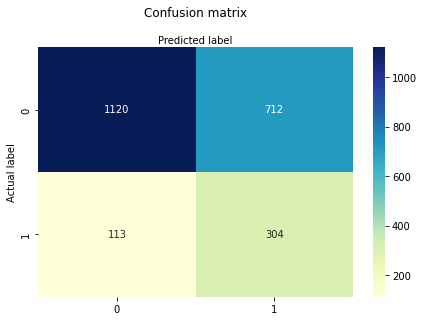

In [36]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(y_test,pred_res)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print_scores("Logistic Regression",y_test,pred_res)

Name of the algorithm: Logistic Regression
Accuracy: 0.6331702979101823
Precision: 0.2992125984251969
AUC Score: 0.6701852491805682
              precision    recall  f1-score   support

           0       0.91      0.61      0.73      1832
           1       0.30      0.73      0.42       417

    accuracy                           0.63      2249
   macro avg       0.60      0.67      0.58      2249
weighted avg       0.80      0.63      0.67      2249



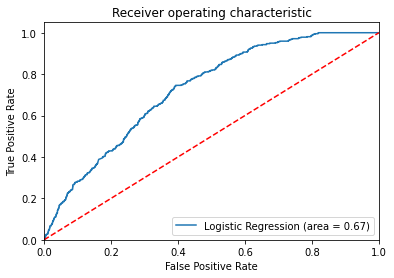

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators= 1400,min_samples_split= 5,min_samples_leaf= 1,max_features= 'sqrt',max_depth= 80,bootstrap= False)
model_rf=classifier_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

Text(33.0, 0.5, 'ACTUAL')

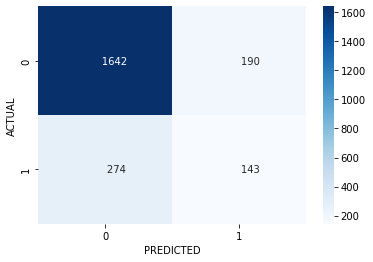

In [40]:
#Confusion Matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='10',cmap='Blues')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

In [41]:
print_scores("Random Forest",y_test,y_pred_rf)

Name of the algorithm: Random Forest
Accuracy: 0.7936860827034238
Precision: 0.4294294294294294
AUC Score: 0.6196069345397045
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1832
           1       0.43      0.34      0.38       417

    accuracy                           0.79      2249
   macro avg       0.64      0.62      0.63      2249
weighted avg       0.78      0.79      0.78      2249



In [42]:
"""
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
"""

"\nfrom sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}\nprint(random_grid)\n"

In [43]:
"""
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)
"""

'\n# Use the random grid to search for best hyperparameters\nfrom sklearn.ensemble import RandomForestRegressor\n# First create the base model to tune\nrf = RandomForestRegressor()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(x_train, y_train)\n'

In [44]:
#rf_random.best_params_

The above quoted codeset is the hyperparameter tuning Decision Tree. We have quoted the same because the code will take a lot of time to run. **(In Hours)**

# Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators = 2000,max_depth=2)
model_gb=gb_classifier.fit(x_train,y_train)
y_pred_gb=model_gb.predict(x_test)

Text(33.0, 0.5, 'ACTUAL')

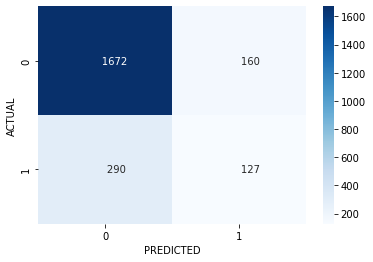

In [46]:
#Confusion Matrix
cm_gb=confusion_matrix(y_test,y_pred_gb)
sns.heatmap(cm_gb,annot=True,fmt='10',cmap='Blues')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

In [47]:
print_scores("Gradient Boosting",y_test,y_pred_gb)

Name of the algorithm: Gradient Boosting
Accuracy: 0.7999110715873722
Precision: 0.4425087108013937
AUC Score: 0.6086100551872912
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1832
           1       0.44      0.30      0.36       417

    accuracy                           0.80      2249
   macro avg       0.65      0.61      0.62      2249
weighted avg       0.78      0.80      0.78      2249



## Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(x_test)

print_scores("DecisionTreeClassifier",y_test,y_pred_dt)

Name of the algorithm: DecisionTreeClassifier
Accuracy: 0.7203201422854602
Precision: 0.3140350877192982
AUC Score: 0.6079143235629837
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1832
           1       0.31      0.43      0.36       417

    accuracy                           0.72      2249
   macro avg       0.59      0.61      0.59      2249
weighted avg       0.76      0.72      0.74      2249



In [49]:

# Do a plot on models accuracy and training and testing dat with respective to depth n various params
# seaborn line plot

"""
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1),
             "max_leaf_nodes":range(2,20,1)
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
"""

'\nfrom sklearn import decomposition, datasets\nfrom sklearn import tree\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\n\ngrid_param={"criterion":["gini","entropy"],\n             "splitter":["best","random"],\n             "max_depth":range(2,50,1),\n             "min_samples_leaf":range(1,15,1),\n             "min_samples_split":range(2,20,1),\n             "max_leaf_nodes":range(2,20,1)\n            }\ngrid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)\ngrid_search.fit(x_train,y_train)\nprint(grid_search.best_params_)\n'

As we are getting the best parameters. **The code will run for about 5 HOURS.** Hence we have quoted the code.

# K Neighbours Classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsClassifier(n_neighbors=2)
model_knn=knn.fit(x_train, y_train)
pred_knn=model_knn.predict(x_test)

print_scores("KNN",y_test,pred_knn)

confusion_matrix(y_test,pred_knn)


Name of the algorithm: KNN
Accuracy: 0.7381058248110272
Precision: 0.28921568627450983
AUC Score: 0.5623383389358383
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1832
           1       0.29      0.28      0.29       417

    accuracy                           0.74      2249
   macro avg       0.56      0.56      0.56      2249
weighted avg       0.74      0.74      0.74      2249



array([[1542,  290],
       [ 299,  118]], dtype=int64)

In [51]:
"""from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_
"""

'from sklearn.model_selection import GridSearchCV\nparameters = {"n_neighbors": range(1, 50)}\ngridsearch = GridSearchCV(KNeighborsRegressor(), parameters)\ngridsearch.fit(x_train, y_train)\ngridsearch.best_params_\n'

In [52]:
"""
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ["none", "l1", "l2", "elasticnet"]
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
"""


'\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import GridSearchCV\nmodel = LogisticRegression()\nsolvers = [\'newton-cg\', \'lbfgs\', \'liblinear\']\npenalty = ["none", "l1", "l2", "elasticnet"]\nc_values = [100, 10, 1.0, 0.1, 0.01]\n# define grid search\ngrid = dict(solver=solvers,penalty=penalty,C=c_values)\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=\'f1\',error_score=0)\ngrid_result = grid_search.fit(x_train, y_train)\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\n'

The above quoted codeset is the hyperparameter tuning. We have quoted the same because the code will take a lot of time to run. **(In Hours)**

# XG Boost

In [53]:
import xgboost
classifier_xg = xgboost.XGBClassifier()
xg_fit=classifier_xg.fit(x_train, y_train)
pred_xg=classifier_xg.predict(x_test)

C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
print_scores("XG Boost",y_test,pred_xg)

Name of the algorithm: XG Boost
Accuracy: 0.8065807025344598
Precision: 0.47039473684210525
AUC Score: 0.6275217817012766
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1832
           1       0.47      0.34      0.40       417

    accuracy                           0.81      2249
   macro avg       0.66      0.63      0.64      2249
weighted avg       0.79      0.81      0.79      2249



------------------------------------------------------------------------------------------------

**Conclusion:**
By comparing the Accuracy and Precision Scores among different machine learning models, Gradient Boosting Classifier yields the best metric scores.